In [2]:
f=open("C:\\Users\\Sharika\\Downloads\\GenBankSequence.fasta")
headers=[]
seqs=[]
for line in f:
    line=line.strip()
    if line[0]=='>':
        headers.append(line[1:])
        seqs.append('')
    else:
        seqs[-1]+=line
f.close()
print(len(headers))

8990


In [3]:
f=open("C:\\Users\\Sharika\\Downloads\\ENASequence.fasta")
for line in f:
    line=line.strip()
    if line[0]=='>':
        headers.append(line[1:])
        seqs.append('')
    else:
        seqs[-1]+=line
f.close()
print(len(headers))  

17282


In [4]:
f=open("C:\\Users\\Sharika\\Downloads\\GisaidSequence.fasta")
for line in f:
    line=line.strip()
    if line[0]=='>':
        headers.append(line[1:])
        seqs.append('')
    else:
        seqs[-1]+=line

f.close()
print(len(headers))

79146


In [5]:
import numpy as np
a= np.unique(headers)
print(len(a)) 
print(len(headers))

79146
79146


(array([8.8400e+02, 1.2100e+02, 2.8200e+02, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.6000e+01, 1.2900e+03, 7.6524e+04, 1.9000e+01, 4.0000e+00]),
 array([9.00000e+00, 1.74810e+03, 3.48720e+03, 5.22630e+03, 6.96540e+03,
        8.70450e+03, 1.04436e+04, 1.21827e+04, 1.39218e+04, 1.56609e+04,
        1.74000e+04, 1.91391e+04, 2.08782e+04, 2.26173e+04, 2.43564e+04,
        2.60955e+04, 2.78346e+04, 2.95737e+04, 3.13128e+04, 3.30519e+04,
        3.47910e+04]),
 <a list of 20 Patch objects>)

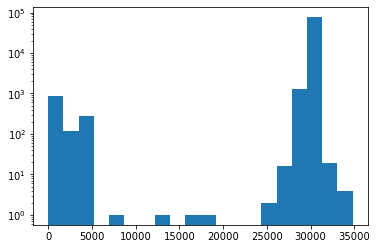

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
num=[]
for j in seqs:
    num.append(len(j))
    
plt.hist(num, bins=20, log=True)

# fixing spaces in headers

In [7]:
headers = [i.replace(' ', '_') for i in headers]

In [57]:
#creating new file with "_" as spaces
f=open("C:\\blast\db\Sequences.fasta", "w")
dict_seqs=dict(zip(headers,seqs))
for i in headers:
    f.write(">" + i + "\n")
    f.write(dict_seqs[i] + "\n")
f.close()

In [8]:
import pandas as pd
import numpy as np
blastResults = pd.read_csv('C://blast/db/Sequences.txt', index_col=False, header=None, sep='\t', engine='python')

In [9]:
#finding unique headers (multiple alignments of one sequence)
blastResults.columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 
                                   'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore', 'ppos', 'qseq', 'sseq']
uniden = set(headers)-set(blastResults['qseqid'].values)
unident=list(uniden)
dict_se=dict(zip(headers,seqs))
print({key:dict_se[key] for key in unident[:50]}.values())
newseq={key:dict_se[key] for key in unident}

dict_values(['GCTATGTGAGATTAAGTTAT', 'TTTTTTTTTTATAACTTAATCTCACATAGC', 'NTGGGCCCA', 'ttccactgccttccaccaaactctgcaggatcccagagtcaggggtctgtatcttcctgctggtggctccagttcaggaacagtaaaccctgctccgaatattgcctctcacatctcgtcaatctccgcgaggactggggaccctgtgacgaacatggagaacatcacatcaggattcctaggacccctgctcgtgttacaggcggggtttttcttgttgacaagaatcctcacaataccgcagagtctagactcgtggtggacttctctcaattttctagggggatctcccgtgtgtcttggccaaaattcgcagtccccaacctccaatcactcaccaacctcctgtcctccaatttgtcctggttatcgctggatgtgtctgcggcgttttatcatattcctcttcatcctgctgctatgcctcatcttcttattggttcttctggattatcaaggtatgttgcccgtttgtcctctaattccaggatcaacaacaaccagtacgggaccatgcaaaacctgcacgactcctgctcaaggcaactctatgtttccctcatgttgctgtacaaaacctacggatggaaattgcacctgtattcccatcccatcgtcctgggctttcgcaaaatacctatgggagtgggcctcagtccgtttctcttggctcagtttactagtgccatttgttcagtggttcgtagggctttcccccactgtttggctttcagctatatggatgatgtggtattgggggccaagtctgtacagcatcgtgagtccctttataccgctgttaccaattttcttttgtctctgggtatacatttaaaccctaacaaaacaaaaagatggggttattccctaaacttcatgggctacataattggaagttggggaactttgccacag

# Finding Duplicate headers after aligning

# Removing headers with duplicate accession numbers

In [11]:
from collections import Counter

In [12]:
#create a dict dict[full header, accession]
#heads=blastResults['qseqid'].values while blastResullts['qseqid'].values !="hCoV-19"
accession=[]
heads = [i for i in blastResults['qseqid'].values if not i.strip('>').startswith("h")]
for i in heads:
    if "ENA" in i:
        accession.append(i.split('|')[-1].split('_')[0])
    else:
        accession.append(i.split('_')[0])
print(len(heads))

access_series=pd.Series(index=heads, data=accession)
unique_access=Counter(accession)
unique_access = pd.Series(unique_access)
nonunique_access = unique_access[unique_access>1]
'''
store_header=[]

for i in unique_access:
    if (unique_access[i]>1) && ("ENA" not in unique_access[i]):
        for j in heads:
            if j==i:
                heads.remove(i)
'''
for i in nonunique_access.index:
    h = access_series[access_series==i]
    for j in h.index:
        if j.startswith("ENA"):
            heads.remove(j)
            
print(len(heads))

17278
8988


# Removing headers with species that are not human

In [13]:
species=[]
# for ENA and GenBank after 1st slash, for gisaid none
#heads = [i for i in blastResults['qseqid'].values if not i.startswith("hCoV-19")]
ref = heads[0]
for i in heads:
    try:
        species.append(i.split('/')[1])
    except:
        species.append("NA")

species_series = pd.Series(index=heads, data=species)
species_series = species_series[(species_series=='human')]#||(species_series=='homo_sapiens')]
heads1 = list(species_series.index)

species_series = pd.Series(index=heads, data=species)
species_series = species_series[(species_series=='homo_sapien')]#||(species_series=='homo_sapiens')]
heads2 = list(species_series.index)

heads = heads1+heads2

'''
for i in species:
    if i!="human":
        for j in heads:
            if i in j:
                heads.remove(j)
'''
'''       
        store_head.append(species_series at species_series == i)
        
for i in store_head:
    for j in heads:
        if j==i:
            heads.remove(i)
'''
heads = list(heads)
heads.append(ref)
print(len(heads))
#heads=the headers from genbank and ENA

8749


# reindex blastResults 

In [14]:
blastResults.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,ppos,qseq,sseq
0,NC_045512.2_|Severe_acute_respiratory_syndrome...,gi|1798174254|ref|NC_045512.2|,100.000,29870,0,0,1,29870,1,29870,0.0,55130,100.00,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
1,MT712208.1_|Severe_acute_respiratory_syndrome_...,gi|1798174254|ref|NC_045512.2|,99.477,765,4,0,1,765,12719,13483,0.0,1391,99.48,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...
2,MT706050.1_|Severe_acute_respiratory_syndrome_...,gi|1798174254|ref|NC_045512.2|,99.983,29806,5,0,1,29806,21,29826,0.0,54985,99.98,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...
3,MT706132.1_|Severe_acute_respiratory_syndrome_...,gi|1798174254|ref|NC_045512.2|,99.977,29843,7,0,1,29843,25,29867,0.0,55042,99.98,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...
4,MT706133.1_|Severe_acute_respiratory_syndrome_...,gi|1798174254|ref|NC_045512.2|,99.976,29782,7,0,1,29782,55,29836,0.0,54931,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...


In [15]:
blastResults.shape

(79141, 15)

In [16]:
new_blastResults = blastResults.set_index("qseqid")
new_blastResults.head()

,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,ppos,qseq,sseq
qseqid,,,,,,,,,,,,,,
"NC_045512.2_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_Wuhan-Hu-1,_complete_genome",gi|1798174254|ref|NC_045512.2|,100.000,29870,0,0,1,29870,1,29870,0.0,55130,100.00,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
"MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds",gi|1798174254|ref|NC_045512.2|,99.477,765,4,0,1,765,12719,13483,0.0,1391,99.48,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...
"MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.983,29806,5,0,1,29806,21,29826,0.0,54985,99.98,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...
"MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.977,29843,7,0,1,29843,25,29867,0.0,55042,99.98,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...
"MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.976,29782,7,0,1,29782,55,29836,0.0,54931,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...


In [17]:
# add all the headers in hcov-19 to heads
heads += [i for i in blastResults['qseqid'].values if i.strip('>').startswith("h")]

In [18]:
new_blastResults.head()

,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,ppos,qseq,sseq
qseqid,,,,,,,,,,,,,,
"NC_045512.2_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_Wuhan-Hu-1,_complete_genome",gi|1798174254|ref|NC_045512.2|,100.000,29870,0,0,1,29870,1,29870,0.0,55130,100.00,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
"MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds",gi|1798174254|ref|NC_045512.2|,99.477,765,4,0,1,765,12719,13483,0.0,1391,99.48,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...
"MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.983,29806,5,0,1,29806,21,29826,0.0,54985,99.98,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...
"MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.977,29843,7,0,1,29843,25,29867,0.0,55042,99.98,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...
"MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.976,29782,7,0,1,29782,55,29836,0.0,54931,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...


In [19]:
heads.remove('NC_045512.2_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_Wuhan-Hu-1,_complete_genome')

In [20]:
#update blast_results !!!!!!!!!!!!!!
updated_blast_results = new_blastResults.loc[heads,:]



# tests

In [21]:
blastResults['qseqid'].head()

0    NC_045512.2_|Severe_acute_respiratory_syndrome...
1    MT712208.1_|Severe_acute_respiratory_syndrome_...
2    MT706050.1_|Severe_acute_respiratory_syndrome_...
3    MT706132.1_|Severe_acute_respiratory_syndrome_...
4    MT706133.1_|Severe_acute_respiratory_syndrome_...
Name: qseqid, dtype: object

In [22]:
species_test_GenBank="MT706136.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-14/2020,_complete_genome"
inner_GenBank=species_test_GenBank.split('/')[1]
print(inner_GenBank)

human


In [23]:
species_test_ENA="ENA|MT451557|MT451557.1_Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/AUS/VIC793/2020_ORF1ab_polyprotein_(ORF1ab),_ORF1a_polyprotein_(ORF1ab),_surface_glycoprotein_(S),_ORF3a_protein_(ORF3a),_envelope_protein_(E),_membrane_glycoprotein_(M),_ORF6_protein_(ORF6),_ORF7a_protein_(ORF7a),_ORF7b_(ORF7b),_ORF8_protein_(ORF8),_nucleocapsid_phosphoprotein_(N),_and_ORF10_protein_(ORF10)_genes,_complete_cds."
inner_ENA=species_test_ENA.split('/')[1]
print(inner_ENA)

human


In [24]:
accession_test_GenBank="MT706136.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-14/2020,_complete_genome"
inner_access_GB=accession_test_GenBank.split('_')[0]
print(inner_access_GB)

MT706136.1


In [25]:
accession_test_ENA="ENA|MT451557|MT451557.1_Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/AUS/VIC793/2020_ORF1ab_polyprotein_(ORF1ab),_ORF1a_polyprotein_(ORF1ab),_surface_glycoprotein_(S),_ORF3a_protein_(ORF3a),_envelope_protein_(E),_membrane_glycoprotein_(M),_ORF6_protein_(ORF6),_ORF7a_protein_(ORF7a),_ORF7b_(ORF7b),_ORF8_protein_(ORF8),_nucleocapsid_phosphoprotein_(N),_and_ORF10_protein_(ORF10)_genes,_complete_cds."
inner_access_ENA=accession_test_ENA.split('|')[len(tim.split('|')) -1 ].split('_')[0]
print(inner_access_ENA)


NameError: name 'tim' is not defined

# Making metadata Dataframe

In [26]:
'hCov-19/Bahrein/BAH-27/2020|EPI_ISL_483565|2020-04-07'.strip('>').startswith("h")
'hCov-19/Bahrein/BAH-27/2020|EPI_ISL_483565|2020-04-07'.split('/')[1]

'Bahrein'

In [27]:
df_metadata=pd.DataFrame(index=heads, columns=['location', 'time'])
#index=list of all the unique headers (blast results)
hcov_locations = []
for i in heads:
    if i.strip('>').startswith("h"):
        df_metadata.loc[i, 'location'] = i.split('/')[1]
        hcov_locations.append(i.split('/')[1])
        df_metadata.loc[i, 'time'] = i.split('|')[2]
    else:#if "ENA" in i:
        df_metadata.loc[i, 'location'] = i.split('/')[2]
        #df.loc[i, column= 'time'] = i.split('/')[len(tim.split('/')) -1 ].split('_')[0]
    #else:
        #df_metadata.loc[i, 'location'] = i.split('/')[2]
        #df.loc[i, column= 'time'] = i.split('/')[len(tim.split('/')) -1 ].split('_')[0]

In [28]:
set(df_metadata['location'].values)-set(hcov_locations)

{'AUS',
 'BEL',
 'BGD',
 'BRA',
 'CHL',
 'CHN',
 'COL',
 'CZE',
 'DEU',
 'EGY',
 'ESP',
 'FRA',
 'GEO',
 'GRC',
 'GUM',
 'HKG',
 'HKG.85_VM20002868',
 'IND',
 'IRN',
 'IRQ',
 'ISR',
 'ITA',
 'JAM',
 'KAZ',
 'KEN',
 'KOR',
 'LKA',
 'MAR',
 'MYS',
 'NGA',
 'NLD',
 'NPL',
 'NZL',
 'PAK',
 'PER',
 'POL',
 'RUS',
 'SAU',
 'SRB',
 'SWE',
 'THA',
 'TLS',
 'TUN',
 'TUR',
 'TWN',
 'URY',
 'USACT-UW420',
 'USACT-UW423',
 'USACT-UW427',
 'USACT-UW428',
 'USACT-UW430',
 'USAOR-UW409',
 'USAUNKNOWN-UW398',
 'USAWA-UW391',
 'USAWA-UW392',
 'USAWA-UW408',
 'USAWA-UW410',
 'USAWA-UW413',
 'UZB',
 'VIE',
 'VNM',
 'ZAF'}

In [29]:
np.unique(hcov_locations)

array(['Algeria', 'Andalusia', 'Anhui', 'Argentina', 'Australia',
       'Austria', 'Bahrein', 'Bangladesh', 'Beijing', 'Belarus',
       'Belgium', 'Benin', 'Bosnia_and_Herzegovina', 'Brazil', 'Brunei',
       'Bucuresti', 'Bulgaria', 'Cambodia', 'Canada', 'Changzhou',
       'Chile', 'China', 'Chongqing', 'Colombia', 'Costa_Rica', 'Croatia',
       'Cyprus', 'Czech_Republic', 'DRC', 'Denmark', 'Ecuador', 'Egypt',
       'England', 'Estonia', 'Felis_catus', 'Finland', 'Foshan', 'France',
       'Fujian', 'Fuyang', 'Fuzhou', 'Gambia', 'Ganzhou', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guam', 'Guangdong', 'Guangzhou',
       'Hangzhou', 'Harbin', 'Hefei', 'Henan', 'Hong_Kong', 'Hungary',
       'ITALY', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jian',
       'Jiangsu', 'Jiangxi', 'Jingzhou', 'Jiujiang', 'Jordan', 'Kanagawa',
       'Kazakhstan', 'Kenya', 'Korea', 'Kuwait', 'Latvia', 'Lebanon',
       'Lishui', 'Li

In [30]:
hcov_location_map = {'Algeria':'Algeria', 'Anhui':'China', 'Argentina':'Argentina', 'Australia':'Australia', 'Austria':'Austria',
               'Andalusia':'Spain','Bahrein':'BHR','Bangladesh':'Bangladesh', 'Beijing':'China', 'Belarus':'Belarus', 'Belgium':'Belgium', 'Benin': 'Benin',
               'Bosnia_and_Herzegovina':'Bosnia_and_Herzegovina', 'Brazil':'Brazil', 'Brunei': 'Brunei', 'Bucuresti':'Romania',
               'Bulgaria':'Bulgaria', 'Cambodia':'Cambodia', 'Canada':'Canada', 'Changzhou':'China', 'Chile':'Chile', 
                'China':'China', 'Chongqing':'China', 'Colombia':'Colombia', 'Costa_Rica':'Costa_Rica', 'Croatia':'Croatia', 
                'Cyprus':'Cyprus','Czech_Republic':'Czech_Republic', 'DRC':'DRC', 'Denmark':'Denmark', 'Ecuador':'Ecuador', 
                'Egypt':'Egypt', 'England':'GBR','Estonia':'Estonia', 'Finland':'Finland', 'Foshan':'China', 'France':'France',
                     'Fujian':'China','Fuyang':'China', 'Fuzhou':'China', 'Gambia':'Gambia', 'Ganzhou':'China', 'Georgia':'Georgia', 'Germany':'Germany',
                'Ghana':'Ghana', 'Greece':'Greece', 'Guam':'USA', 'Guangdong':'China', 'Guangzhou':'China', 'Hangzhou':'China',
                'Harbin':'China', 'Hefei':'China', 'Henan':'China', 'Hong_Kong':'China', 'Hungary':'Hungary', 'ITALY':'Italy',
                'Iceland':'Iceland', 'India':'India', 'Indonesia':'Indonesia', 'Iran':'Iran', 'Iraq':'Iraq', 'Ireland':'Ireland',
                     'Israel':'Israel', 'Italy':'Italy', 'Jamaica':'Jamaica', 'Japan':'Japan', 'Jian':'China', 'Jiangsu': 'China',
                     'Jiangxi':'China', 'Jingzhou':'China', 'Jiujiang':'China', 'Jordan':'Jordan', 'Kanagawa':'Japan',
       'Kazakhstan':'Kazakhstan', 'Kenya':'Kenya', 'Korea':'KOR', 'Kuwait':'Kuwait', 'Latvia':'Latvia', 'Lebanon':'Lebanon',
       'Lishui':'China', 'Lithuania':'Lithuania', 'Luxembourg':'Luxembourg', 'Malaysia':'Malaysia', 'Mexico':'Mexico',
       'Mongolia':'Mongolia', 'Morocco':'Morocco', 'Myanmar':'Myanmar', 'NanChang':'China', 'Nanchang':'China', 'Nepal':'Nepal',
       'Netherlands': 'Netherlands', 'New_Zealand':'New_Zealand', 'Nigeria':'Nigeria', 'Northern_Ireland':'GBR',
       'Norway':'Norway', 'Oman':'Oman', 'Pakistan':'Pakistan', 'Panama':'Panama', 'Peru':'Peru', 'Philippines':'Philippines',
       'Pingxiang':'China', 'Poland':'Poland', 'Portugal':'Portugal', 'Puerto_Rico':'USA', 'Qatar':'Qatar',
       'Romania':'Romania', 'Romania_':'Romania', 'Russia':'Russia', 'Saudi_Arabia':'Saudi_Arabia', 'Scotland':'GBR',
       'Senegal':'Senegal', 'Serbia':'Serbia', 'Shandong':'China', 'Shanghai':'China', 'Shangrao':'China',
       'Shaoxing':'China', 'Shenzhen':'China', 'Sichuan':'China', 'Singapore':'Singapore', 'Slovakia':'Slovakia',
       'Slovenia':'Slovenia', 'SouthAfrica':'South_Africa', 'South_Africa':'South_Africa', 'South_Korea':'KOR', 'Spain':'Spain',
       'Sri_Lanka':'Sri_Lanka', 'Sweden':'Sweden', 'Switzerland':'Switzerland', 'Taiwan':'Taiwan', 'Thailand':'Thailand',
       'Tianmen':'China', 'Timor-Leste':'Timor-Leste', 'Tunisia':'Tunisia', 'Turkey':'Turkey', 'USA':'USA', 'Uganda':'Uganda',
       'United_Arab_Emirates':'United_Arab_Emirates', 'Uruguay':'Uruguay', 'Uzbekistan':'Uzbekistan', 'Venezuela':'Venezuela',
       'Vietnam':'Vietnam', 'Wales':'GBR', 'Wuhan':'China', 'Xinyu':'China', 'Yichun':'China', 'Yingtan':'China',
       'Yunnan':'China', 'Zhejiang':'China', 'india':'India'}

In [31]:
[i for i in np.unique(hcov_locations) if i not in hcov_location_map.keys()]

['Felis_catus',
 'bat',
 'canine',
 'cat',
 'env',
 'mink',
 'mouse',
 'pangolin',
 'tiger']

In [32]:
rest_map = {'AUS':'AUS',
 'BEL':'BEL',
 'BGD':'BGD',
 'BRA':'BRA',
 'CHL':'CHL',
 'CHN':'CHN',
 'COL':'COL',
 'CZE':'CZE',
 'DEU':'DEU',
 'EGY':'EGY',
 'ESP':'ESP' ,
 'FRA':'FRA',
 'GEO': 'GEO',
 'GRC': 'GRC',
 'GUM': 'GUM',
 'HKG':'HKG',
 'HKG.85_VM20002868': 'HKG',
 'IND': 'IND',
 'IRN':'IRN',
 'IRQ':'IRQ',
 'ISR':'ISR',
 'ITA':'ITA',
 'JAM':'JAM',
 'KAZ':'KAZ',
 'KEN':'KEN',
 'KOR':'KOR',
 'LKA':'LKA',
 'MAR':'MAR',
 'MYS':'MYS',
 'NGA':'NGA',
 'NLD':'NLD',
 'NPL':'NPL',
 'NZL':'NZL',
 'PAK':'PAK',
 'PER':'PER',
 'POL':'POL',
 'RUS':'RUS',
 'SAU':'SAU',
 'SRB':'SRB',
 'SWE':'SWE',
 'THA':'THA',
 'TLS':'TLS',
 'TUN':'TUN',
 'TUR':'TUR',
 'TWN':'TWN',
 'URY':'URY',
 'USACT-UW420':'USA',
 'USACT-UW423':'USA',
 'USACT-UW427':'USA',
 'USACT-UW428':'USA',
 'USACT-UW430':'USA',
 'USAOR-UW409':'USA',
 'USAUNKNOWN-UW398':'USA',
 'USAWA-UW391':'USA',
 'USAWA-UW392':'USA',
 'USAWA-UW408':'USA',
 'USAWA-UW410':'USA',
 'USAWA-UW413':'USA',
 'UZB':'UZB',
 'VIE':'VIE',
 'VNM':'VNM',
 'ZAF':'ZAF'}

In [33]:
[i for i in list(set(df_metadata['location'].values)-set(hcov_locations)) if i not in rest_map.keys()]

[]

In [34]:
location_map = {**hcov_location_map, **rest_map}

In [35]:
df_metadata.shape

(70611, 2)

In [36]:
len(set(df_metadata['location'].values))

220

In [37]:
df_metadata['location'] = df_metadata['location'].map(location_map)

In [38]:
len(set(df_metadata['location'].values))

147

In [39]:
set(df_metadata['location'].values)

{'AUS',
 'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'BEL',
 'BGD',
 'BHR',
 'BRA',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bosnia_and_Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'CHL',
 'CHN',
 'COL',
 'CZE',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa_Rica',
 'Croatia',
 'Cyprus',
 'Czech_Republic',
 'DEU',
 'DRC',
 'Denmark',
 'EGY',
 'ESP',
 'Ecuador',
 'Egypt',
 'Estonia',
 'FRA',
 'Finland',
 'France',
 'GBR',
 'GEO',
 'GRC',
 'GUM',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'HKG',
 'Hungary',
 'IND',
 'IRN',
 'IRQ',
 'ISR',
 'ITA',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'JAM',
 'Jamaica',
 'Japan',
 'Jordan',
 'KAZ',
 'KEN',
 'KOR',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'LKA',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'MAR',
 'MYS',
 'Malaysia',
 'Mexico',
 'Mongolia',
 'Morocco',
 'Myanmar',
 'NGA',
 'NLD',
 'NPL',
 'NZL',
 'Nepal',
 'Netherlands',
 'New_Zeala

In [40]:
final_map = {'AUS':'AUS',
 'Algeria':'DZA',
 'Argentina':'ARG',
 'Australia':'AUS',
 'Austria':'AUT',
 'BEL':'BEL',
 'BGD':'BGD',
 'BRA':'BRA',
 'BHR': 'BHR',
 'Bangladesh':'BGD',
 'Belarus':'BLR',
 'Belgium':'BEL',
 'Benin':'BEN',
 'Bosnia_and_Herzegovina':'BIH',
 'Brazil':'BRA',
 'Brunei':'BRN',
 'Bulgaria':'BGR',
 'CHL':'CHL',
 'CHN':'CHN',
 'COL':'COL',
 'CZE':'CZE',
 'Cambodia':'KHM',
 'Canada':'CAN',
 'Chile':'CHL',
 'China':'CHN',
 'Colombia':'COL',
 'Costa_Rica':'CRI',
 'Croatia':'HRV',
 'Cyprus':'CYP',
 'Czech_Republic':'CZE',
 'DEU':'DEU',
 'DRC':'COD',
 'Denmark':'DNK' ,
 'EGY':'EGY',
 'ESP':'ESP',
 'Ecuador':'ECU',
 'Egypt':'EGY',
 'Estonia':'EST',
 'FRA':'FRA',
 'Finland':'FIN',
 'France':'FRA',
 'GBR':'GBR',
 'GEO':'GEO',
 'GRC':'GRC',
 'GUM':'GUM',
 'Gambia':'GMB',
 'Georgia':'GEO',
 'Germany':'DEU',
 'Ghana':'GHA',
 'Greece':'GRC',
 'HKG':'HKG',
 'Hungary':'HUN',
 'IND':'IND',
 'IRN':'IRN',
 'IRQ':'IRQ',
 'ISR':'ISR',
 'ITA':'ITA',
 'Iceland':'ISL',
 'India':'IND',
 'Indonesia':'IDN',
 'Iran':'IRN',
 'Iraq':'IRQ',
 'Ireland':'IRL',
 'Israel':'ISR',
 'Italy':'ITA',
 'JAM':'JAM',
 'Jamaica':'JAM',
 'Japan':'JPN',
 'Jordan':'JOR',
 'KAZ':'KAZ',
 'KEN':'KEN',
 'KOR':'KOR',
 'Kazakhstan':'KAZ',
 'Kenya':'KEN',
 'Kuwait':'KWT',
 'LKA':'LKA',
 'Latvia':'LVA',
 'Lebanon':'LBN',
 'Lithuania':'LTU',
 'Luxembourg':'LUX',
 'MAR':'MAR',
 'MYS':'MYS',
 'Malaysia':'MYS',
 'Mexico':'MEX',
 'Mongolia':'MNG',
 'Morocco':'MAR',
 'Myanmar':'MMR',
 'NGA':'NGA',
 'NLD':'NLD',
 'NPL':'NPL',
 'NZL':'NZL',
 'Nepal':'NPL',
 'Netherlands':'NLD',
 'New_Zealand':'NZL',
 'Nigeria':'NGA',
 'Norway':'NOR',
 'Oman':'OMN',
 'PAK':'PAK',
 'PER':'PER',
 'POL':'POL',
 'Pakistan':'PAK',
 'Panama':'PAN',
 'Peru':'PER',
 'Philippines':'PHL',
 'Poland':'POL',
 'Portugal':'PRT',
 'Qatar':'QAT',
 'RUS':'RUS',
 'Romania':'ROU',
 'Russia':'RUS',
 'SAU':'SAU',
 'SRB':'SRB',
 'SWE':'SWE',
 'Saudi_Arabia':'SAU',
 'Senegal':'SEN',
 'Serbia':'SRB',
 'Singapore':'SGP',
 'Slovakia':'SVK',
 'Slovenia':'SVN',
 'South_Africa':'ZAF',
 'Spain':'ESP',
 'Sri_Lanka':'LKA',
 'Sweden':'SWE',
 'Switzerland':'CHE',
 'THA':'THA',
 'TLS':'TLS',
 'TUN':'TUN',
 'TUR':'TUR',
 'TWN':'TWN',
 'Taiwan':'TWN',
 'Thailand':'THA',
 'Timor-Leste':'TLS',
 'Tunisia':'TUN',
 'Turkey':'TUR',
 'URY':'URY',
 'USA':'USA',
 'UZB':'UZB',
 'Uganda':'UGA',
 'United_Arab_Emirates':'ARE',
 'Uruguay':'URY',
 'Uzbekistan':'UZB',
 'VNM':'VNM',
 'Venezuela':'VEN',
 'Vietnam':'VNM',
 'ZAF':'ZAF'}

In [41]:
df_metadata['location'] = df_metadata['location'].map(final_map)

In [42]:
len(set(df_metadata['location'].values))

101

In [43]:
df_metadata.shape

(70611, 2)

In [44]:
df_metadata = df_metadata.dropna(subset=['location'])

In [45]:
df_metadata.head()


,location,time
"MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds",VNM,NaN
"MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome",NZL,NaN
"MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome",USA,NaN
"MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome",USA,NaN
"MT706134.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-12/2020,_complete_genome",USA,NaN


In [46]:
df_metadata.shape

(70534, 2)

In [66]:
time_df = pd.read_csv('C://Users/Sharika/Downloads/sequences.csv', index_col=0)

In [48]:
list(df_metadata.index)

['MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds',
 'MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome',
 'MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome',
 'MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome',
 'MT706134.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-12/2020,_complete_genome',
 'MT706135.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-13/2020,_complete_genome',
 'MT706136.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-14/2020,_complete_genome',
 'MT706137.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_S

In [49]:
access_series

NC_045512.2_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_Wuhan-Hu-1,_complete_genome                                                                                                                                                                                                                                                                                                                                                                                    NC
MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds                                                                                                                                                                                                                                                                                            MT712208.1
MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_

In [51]:
not_hcov = [i for i in df_metadata.index if not i.strip('>').startswith("h")]

In [52]:
len(not_hcov)

8744

In [69]:
new_access = access_series[not_hcov]

In [70]:
len(np.unique(new_access.values))

8744

In [71]:
new_access_values = np.array([i.split('.')[0] for i in new_access.values])

In [72]:
print(len(new_access_values))
print(len(np.unique(new_access_values)))

8744
8744


In [73]:
new_access_values[:5]

array(['MT712208', 'MT706050', 'MT706132', 'MT706133', 'MT706134'],
      dtype='<U8')

In [74]:
new_access = pd.Series(index=new_access_values, data=new_access.index)

In [75]:
new_access.head()

MT712208    MT712208.1_|Severe_acute_respiratory_syndrome_...
MT706050    MT706050.1_|Severe_acute_respiratory_syndrome_...
MT706132    MT706132.1_|Severe_acute_respiratory_syndrome_...
MT706133    MT706133.1_|Severe_acute_respiratory_syndrome_...
MT706134    MT706134.1_|Severe_acute_respiratory_syndrome_...
dtype: object

In [67]:
time_df = time_df.iloc[1:,:]['Collection_Date']

In [76]:
time_df = time_df[new_access_values]
time_df

Accession
MT712208    2020-02-10
MT706050    2020-03-21
MT706132    2020-03-15
MT706133    2020-03-15
MT706134    2020-03-16
               ...    
MT416726           NaN
MT507793    2020-03-11
MT507794    2020-03-16
MT507795    2020-04-06
MT507796    2020-04-01
Name: Collection_Date, Length: 8744, dtype: object

In [77]:
time_df = time_df.dropna()
time_df

Accession
MT712208    2020-02-10
MT706050    2020-03-21
MT706132    2020-03-15
MT706133    2020-03-15
MT706134    2020-03-16
               ...    
MN985325    2020-01-19
MT507793    2020-03-11
MT507794    2020-03-16
MT507795    2020-04-06
MT507796    2020-04-01
Name: Collection_Date, Length: 8742, dtype: object

In [79]:
new_time_df = pd.Series(index = new_access[time_df.index], data=time_df.values)
new_time_df

MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds    2020-02-10
MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome                                                         2020-03-21
MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome                                                             2020-03-15
MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome                                                             2020-03-15
MT706134.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-12/2020,_complete_genome                                                             2020-03-16
                                             

In [80]:
df_metadata.loc[new_time_df.index, 'time'] = new_time_df

In [81]:
df_metadata.head()

,location,time
"MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds",VNM,2020-02-10
"MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome",NZL,2020-03-21
"MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome",USA,2020-03-15
"MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome",USA,2020-03-15
"MT706134.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-12/2020,_complete_genome",USA,2020-03-16


In [82]:
df_metadata.shape

(70534, 2)

In [84]:
df_metadata = df_metadata.dropna()

In [85]:
df_metadata.shape

(70532, 2)

In [86]:
df_metadata.to_csv("df_metadata.csv")

In [87]:
updated_blast_results = updated_blast_results.loc[df_metadata.index, :]

In [89]:
updated_blast_results.shape

(70532, 14)

In [90]:
updated_blast_results.head()

,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,ppos,qseq,sseq
"MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds",gi|1798174254|ref|NC_045512.2|,99.477,765,4,0,1,765,12719,13483,0.0,1391,99.48,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...
"MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.983,29806,5,0,1,29806,21,29826,0.0,54985,99.98,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...
"MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.977,29843,7,0,1,29843,25,29867,0.0,55042,99.98,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...
"MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.976,29782,7,0,1,29782,55,29836,0.0,54931,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
"MT706134.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-12/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.980,29782,6,0,1,29782,55,29836,0.0,54935,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...


In [175]:
hCOV_country=">hCoV-19/England/09c/2020|EPI_ISL_412116|2020-02-09"
inner_hCOV=hCOV_country.split('/')[1]
print(inner_hCOV)

England


In [182]:
ena_country=">ENA|MT451614|MT451614.1_Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/AUS/VIC875/2020,_complete_genome."
inner_ENA=ena_country.split('/')[2]
print(inner_ENA)

AUS


In [177]:
genbank_country=">MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome"
inner_genbank=genbank_country.split('/')[2]
print(inner_genbank)

NZL


In [179]:
hCOV_time=">hCoV-19/England/09c/2020|EPI_ISL_412116|2020-02-09"
inner_htime=hCOV_time.split('|')[2]
print(inner_htime)

2020-02-09


In [181]:
ena_time=">ENA|MT520387|MT520387.1_Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/MA_MGH_00571/2020,_complete_genome."
inner_enatime=ena_time.split('/')[len(ena_time.split('/')) -1 ].split('_')[0]
print(inner_enatime)

2020,


# Making a DataFrame for every genomic position

In [ ]:
import difflib
a = 'ACAACACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTTTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAGTTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTGTCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAATAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGCTTCATTTAATTATTTGAAGTCACCTAATTTTTCTAAACTGATAAATATTATAATTTGGTTTTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTACTCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTTGCGTAGTGATGTGCTATTACCTCTTACGCAATATAATAGATACTTAGCTCTTTATAATAAGTACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCACTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTGGTGTTTATGATTACTTAGTTTCTACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAAGAATAGCATAGATGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTAGCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTTGCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACTTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTTTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTCGATGCTTATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAATTAGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAGTTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAATTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAACTATTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTACTGCTGTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGTAGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGGTGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCAGATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCATAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTGTTGTTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTGGCCTTGAAGCCCCTTTTCTCTATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTTCTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTGACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCC'
b = 'ACAA-ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTCTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAGTTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTGTCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAATAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGCTTCATTTAATTATTTGAAGTCACCTAATTTTTCTAAACTGATAAATATTATAATTTGGTTTTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTACTCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTTGCGTAGTGATGTGCTATTACCTCTTACGCAATATAATAGATACTTAGCTCTTTATAATAAGTACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCACTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTGGTGTTTATGATTACTTAGTTTCTACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAAGAATAGCATAGATGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTAGCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTTGCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTCGATGCTTATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAATTAGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAGTTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAATTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAACTATTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTACTGCTGTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGTAGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCAGATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCAGAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTGTTGTTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTGGCCTTGAAGCCCCTTTTCTCTATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTTCTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTGACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCC'
'''
#print('{} => {}'.format(a,b))  
for i,s in enumerate(difflib.ndiff(a, b)):
    if s[0]==' ': continue
    elif s[0]=='-':
        print(u'Delete "{}" from position {}'.format(s[-1],i))
    elif s[0]=='+':
        print(u'Add "{}" to position {}'.format(s[-1],i))   
'''

In [93]:
updated_blast_results.head()

,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,ppos,qseq,sseq
"MT712208.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/VNM/NIHE/2020_ORF1a_polyprotein_(ORF1ab)_and_ORF1ab_polyprotein_(ORF1ab)_genes,_partial_cds",gi|1798174254|ref|NC_045512.2|,99.477,765,4,0,1,765,12719,13483,0.0,1391,99.48,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...,ATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACA...
"MT706050.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/NZL/20CHL869065O/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.983,29806,5,0,1,29806,21,29826,0.0,54985,99.98,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...
"MT706132.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-04/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.977,29843,7,0,1,29843,25,29867,0.0,55042,99.98,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...,TAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA...
"MT706133.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-11/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.976,29782,7,0,1,29782,55,29836,0.0,54931,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
"MT706134.1_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_SARS-CoV-2/human/USA/WI-UW-12/2020,_complete_genome",gi|1798174254|ref|NC_045512.2|,99.980,29782,6,0,1,29782,55,29836,0.0,54935,99.98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...


In [95]:
# dataframe for storing mutations
mut_df = pd.DataFrame(index=updated_blast_results.index, columns=range(len(dict_se['NC_045512.2_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_Wuhan-Hu-1,_complete_genome'])))
mut_df.fillna(0, inplace=True)

MemoryError: Unable to allocate 15.7 GiB for an array with shape (29903, 70532) and data type object

In [96]:
len(updated_blast_results.index)

70532

In [147]:
for i in updated_blast_results.index:
    query=updated_blast_results.loc[i, 'qseq']
    subject=updated_blast_results.loc[i, 'sseq']
    mut_location = [j for j in range(len(subject)) if query[j] != subject[j]]
    query_gap=list(np.where(np.array([j for j in query])=='-')[0])
    subject_gap=list(np.where(np.array([j for j in subject])=='-')[0])
    mut_location = [j for j in mut_location if j not in query_gap and j not in subject_gap]
    
    position=updated_blast_results.loc[i, 'sstart']
    adj_mut = []
    
    for j in mut_location:
        subject_substring = subject.loc[:j+1]
        count = subject_substring.count('-')
        adj_mut.append(j-count+position)
        
    mut_df.loc[i, adj_mut] = 1
    

[4, 215, 3011, 14382, 18851, 23377, 25537]

In [162]:
#gaps
for 
print(list(np.where(np.array([i for i in a])=='-')[0]))
print(list(np.where(np.array([i for i in b])=='-')[0]))



[]
[4]


NameError: name 'query' is not defined

In [165]:
b[:215+1]
#then count all the '-' in this substring
#subtract one for each '-'

'ACAA-ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTC'

In [92]:
dict_se['NC_045512.2_|Severe_acute_respiratory_syndrome_coronavirus_2_isolate_Wuhan-Hu-1,_complete_genome']

'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

In [160]:
np.where(np.array([1,2,3])==2)

(array([1], dtype=int64),)

In [97]:
updated_blast_results.to_csv("updatedBlastResults.csv", header=True)

In [ ]:
qseq= blastResults.loc(:, "qseq")
sseq= blastResults.loc(:, "sseq")
length= blastResults.loc(:, "length")
mismatch=[] #input where mismatch occurred, separated by ';' ex) A-G, 5000 ; G-T, 27990
gaps=[] #input where gaps occurred, separated by ';'
for a,b in zip(qseq, sseq):
    gaps.append('')
    mismatch.append('')
    for c,d in zip(a,b):
    #positions in a string
        if (c='-'):
            #length[a]+=1
            gaps[a]+=a.index(c)+1
            
        if (c='-')&&(a!=b):
            mismatch[a]+=d + "-" c + "," + a.index(c)+1
